In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [88]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Datasets/diabetes.csv")
data.shape

(768, 9)

In [89]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [90]:
# Ahora algunas estadísticas de nuestros datos
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


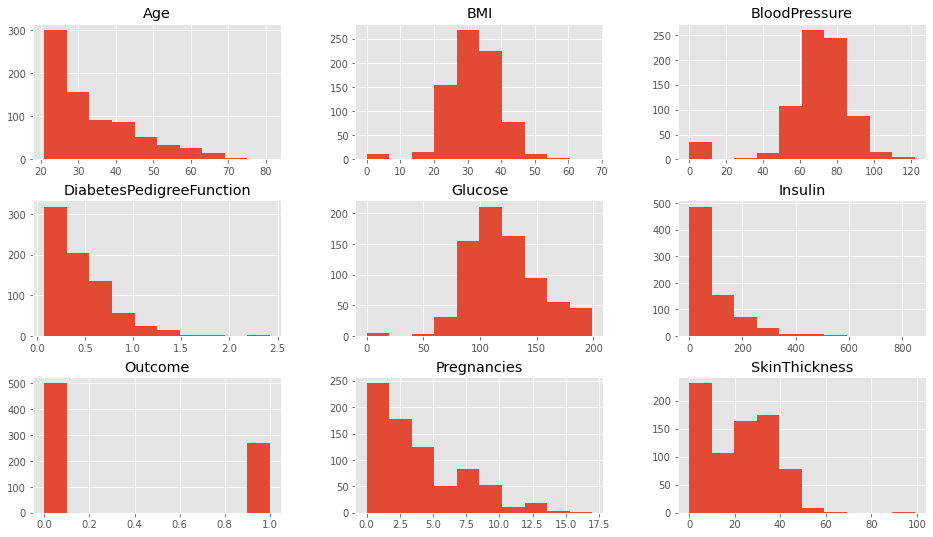

In [95]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(1).hist()
plt.show()

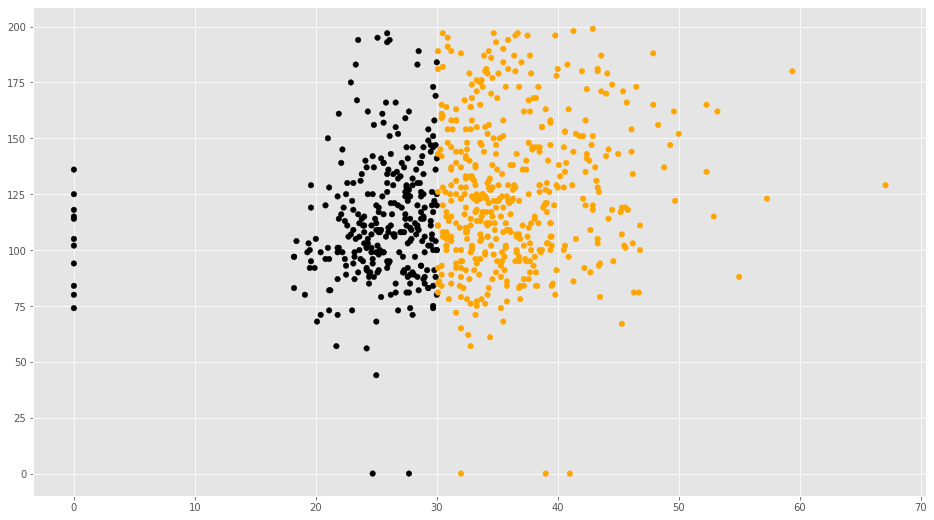

In [186]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['BMI'] <= 70) & (data['Glucose'] <= 200)]

colores=['orange','black']
tamanios=[30,60]

f1 = filtered_data['BMI'].values
f2 = filtered_data['Glucose'].values


# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['BMI']>30):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [187]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["BMI"]]
X_train = np.array(dataX)
y_train = filtered_data['Glucose'].values

# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


Coefficients: 
 [0.89650903]
Independent term: 
 92.2128961628363
Mean squared error: 971.02
Variance score: 0.05


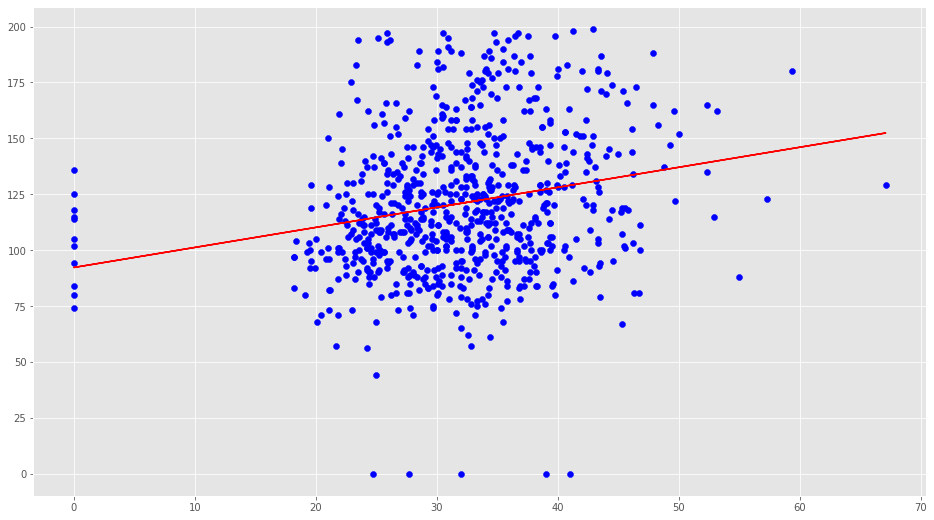

In [197]:
viz_train = plt
viz_train.scatter(X_train, y_train, color='blue')
viz_train.plot(X_train, y_pred , color = 'red')
viz_train.show()

In [198]:
#Vamos a comprobar:
# Quiero predecir cuánto de "BMI" voy a obtener por Glucosa de 100 ,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[100]])
print(int(y_Dosmil))

181


In [199]:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de la insulina, presion, edad
suma = (filtered_data["Insulin"] + filtered_data['Age'].fillna(0) + filtered_data['BloodPressure'])
dataX2 =  pd.DataFrame()
dataX2["BMI"] = filtered_data["BMI"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['Glucose'].values

In [200]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [0.56662255 0.0906771 ]
Mean squared error: 861.29
Variance score: 0.16


Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

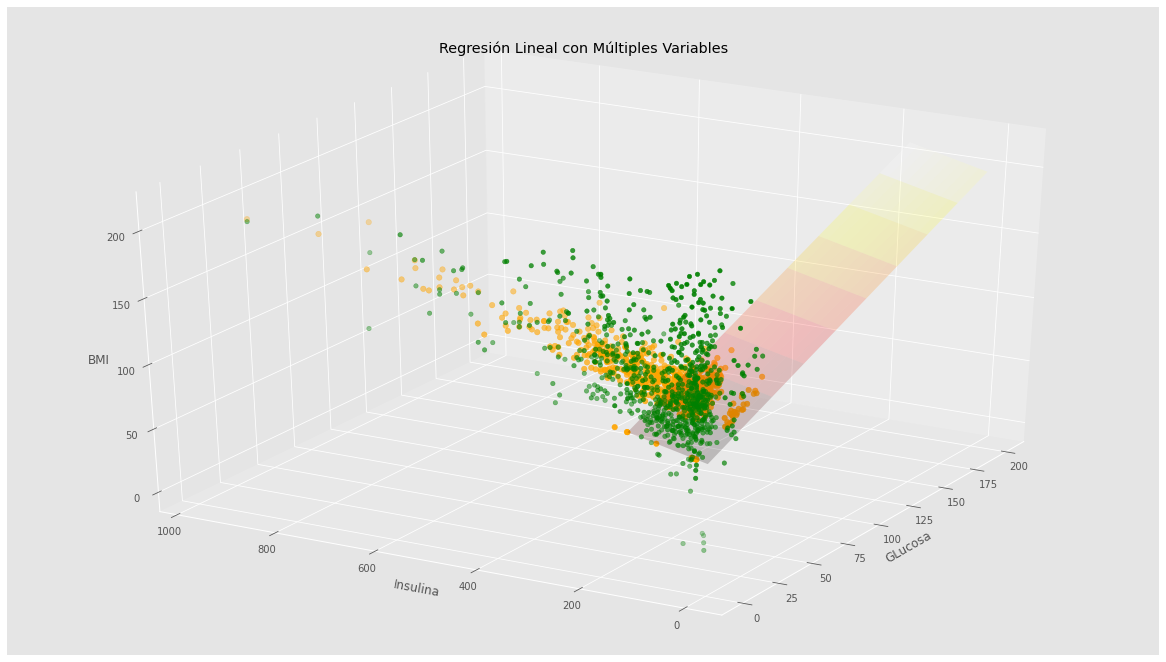

In [206]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 200, num=10), np.linspace(0, 150, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='green',s=20)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='orange',s=30)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=-150)
        
ax.set_xlabel('GLucosa')
ax.set_ylabel('Insulina')
ax.set_zlabel('BMI')
ax.set_title('Regresión Lineal con Múltiples Variables')

In [210]:
# Si quiero predecir cuánto de  "Glucosa" tiene una persona por su  
# insulina: 40
# BIM: 30 
# presion: 60
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[50,+40+30+60]])
print(int(z_Dosmil))

126
